In [2]:
#libraries
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text


#import data
df = pd.read_csv(r'C:\Users\colin\Desktop\data\Excel\Elo_rating_system\Player_tbl.csv', sep=';')

Commencons par l’idée la plus simple, chaque victoire donne 1 point au vainqueur

In [68]:
players = df['Name'].to_list()

ratings = pd.Series(0.0, index=players)

nb_rounds = 5000

df_score_01 = pd.DataFrame(index=players, columns=[f'Round {i+1}' for i in range(nb_rounds)], dtype=float)

for i in range(nb_rounds):
    np.random.shuffle(players)
    duel = [(players[j], players[j+1]) for j in range(0, len(players)-1,2)]

    for pA, pB in duel:
        lvl_A = int(df[df['Name'] == pA].iloc[0]['Level'])
        lvl_B = int(df[df['Name'] == pB].iloc[0]['Level'])

        prob_pA_win = lvl_A / (lvl_A + lvl_B)

        win_pA = np.random.choice([1, 0], p=[prob_pA_win, 1- prob_pA_win])

        if win_pA:
            ratings[pA] += 1
        else:
            ratings[pB] += 1

    df_score_01[f'Round {i+1}'] = ratings

df_score_01

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10,...,Round 4991,Round 4992,Round 4993,Round 4994,Round 4995,Round 4996,Round 4997,Round 4998,Round 4999,Round 5000
Abdul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0
Alexandre,0.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,3.0,...,631.0,631.0,631.0,631.0,631.0,631.0,631.0,632.0,632.0,633.0
Ali,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,822.0,822.0,822.0,822.0,822.0,822.0,822.0,822.0,822.0,823.0
Anita,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,...,947.0,947.0,947.0,947.0,948.0,948.0,948.0,949.0,949.0,950.0
Anna,0.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,...,1054.0,1054.0,1054.0,1054.0,1054.0,1054.0,1054.0,1054.0,1054.0,1054.0
Antonio,1.0,1.0,2.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,...,1179.0,1179.0,1179.0,1179.0,1179.0,1179.0,1179.0,1179.0,1179.0,1179.0
Barbara,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,...,1275.0,1276.0,1277.0,1278.0,1278.0,1278.0,1278.0,1278.0,1279.0,1279.0
Carlos,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,...,1336.0,1336.0,1337.0,1337.0,1338.0,1339.0,1339.0,1339.0,1340.0,1340.0
Charles,1.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,...,1439.0,1439.0,1440.0,1440.0,1440.0,1440.0,1441.0,1442.0,1442.0,1442.0
Daniel,1.0,2.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,...,1520.0,1520.0,1520.0,1520.0,1520.0,1520.0,1521.0,1521.0,1522.0,1522.0


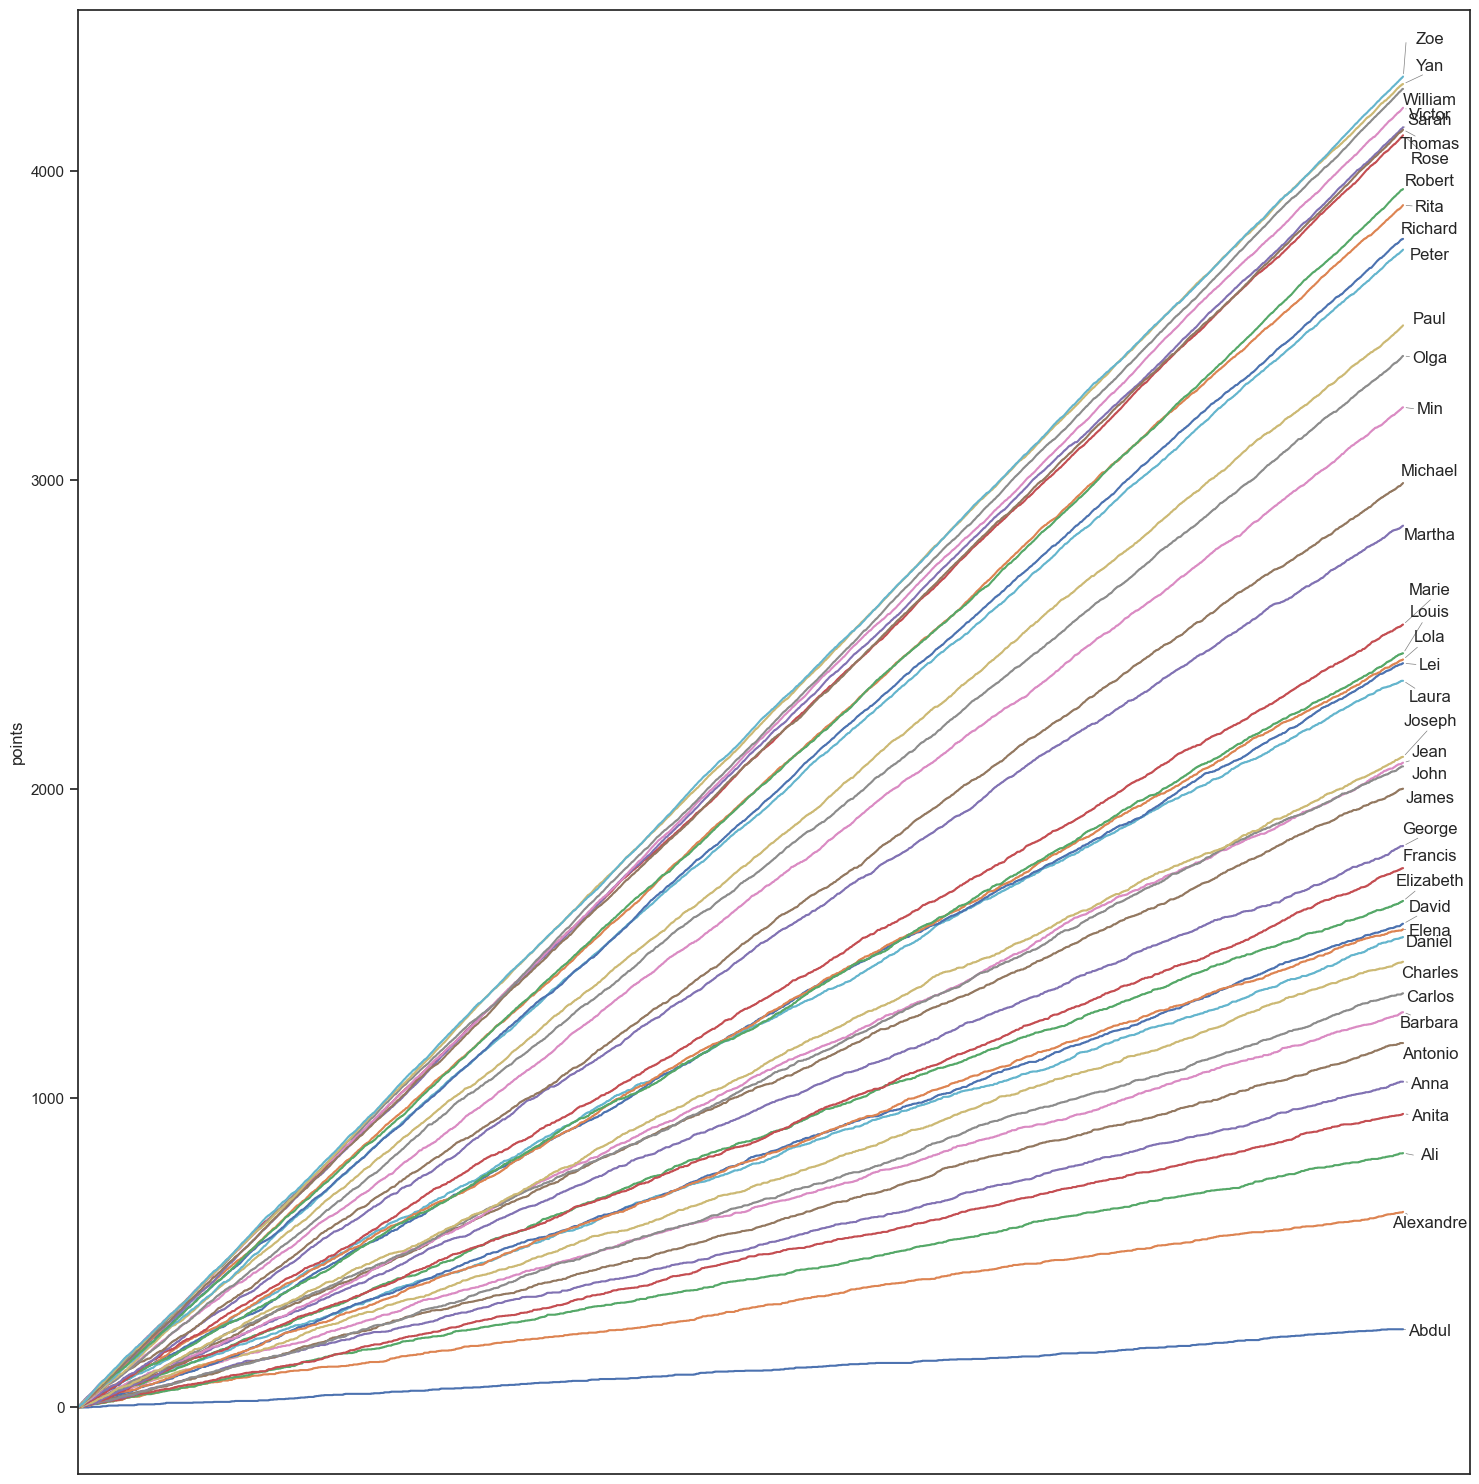

In [69]:
plt.figure(figsize=(15, 15))

sns.set_theme(style='ticks')
sns.despine()
x_label = len(df_score_01.columns)

texts=[]

for player in df_score_01.index:
    scores = df_score_01.loc[player]
    plt.plot(df_score_01.columns, scores, label=player)

    
    text = plt.text(
        x=x_label,   
        y=scores.iloc[-1],             
        s=player,
        fontsize=12,
        va='center',
        ha='left'
    )

    texts.append(text)

adjust_text(texts, only_move={'points': 'y', 'texts': 'y'}, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

for t in texts:
    t.set_x(x_label + 100)

plt.xlim(-1, x_label + 250)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.title('')
plt.xlabel('')
plt.ylabel('points')
plt.grid(False)
plt.legend().remove()
plt.tight_layout()

plt.show()

C’est un bon début, les joueurs les plus forts sont bien ceux comptabilisant le plus grand nombre de points, on observe cependant deux problèmes ici, les points ne se stabilisent pas, il s’agit juste d’un cumul de point au fur et à mesure que le nombre de match augmente, et rien n’empêcherai un joueur moyen de jouer en continu contre le joueur le plus faible afin d’accumuler beaucoup de points ce qui rompt la fiabilité de notre système. Ce que l’on veut, c’est un système dont la note de chaque joueur converge vers une valeur qui reflète son véritable niveau. 
L’une des choses que nous avons oubliés ici c’est la notion d’équilibrage. Peut importe les joueurs qui s’affrontent, le gagnant remporte toujours un point. Or, il parait logique que le premier du classement gagne face au dernier et à l’inverse, on ne peut pas s’attendre à ce qu’un joueur faible gagne aux meilleurs joueurs. Dans ces deux cas, on comprend bien que le joueur le plus fort ne peut pas être récompensé au détriment d’un joueur bien plus faible qui lui se verrai pénalisé.
En revanche si un joueur classé plus faible bat son adversaire classé plus fort cela devrait donner lieu à pas mal de points car ça signifie que ce joueur était plus fort que ce que sa notation actuelle suggérait ou que l'autre était plus faible que prévu.
Voyons comment cela se traduit. Commençons par calculer la chance de victoire d’un joueur. On note x la notation de sa performance réelle et y celle de son adversaire. Le taux de victoire attendu sera donc le résultat de cette formule :


\begin{equation*}
P(x)=\frac{x}{\Bigl(x+y)}
\end{equation*}

Cette valeur comprise entre 0 et 1 peut nous aider pour la distribution des points, le gagnant recevra donc 1-P(x) et le perdant 0-P(x). Evidemment, d’une partie à l’autre le score de chaque joueur continuera de bouger, mais il aura tendance à converger vers une note qui reflète ses performances. Donnons 100 points de départs à chaque joueur et notons l’évolution de leur score.

In [72]:
players = df['Name'].to_list()

ratings = pd.Series(100.0, index=players)

nb_rounds = 5000

df_score_02 = pd.DataFrame(index=players, columns=[f'Round {i+1}' for i in range(nb_rounds)], dtype=float)

for i in range(nb_rounds):
    np.random.shuffle(players)
    duel = [(players[j], players[j+1]) for j in range(0, len(players)-1,2)]

    for pA, pB in duel:
        lvl_A = int(df[df['Name'] == pA].iloc[0]['Level'])
        lvl_B = int(df[df['Name'] == pB].iloc[0]['Level'])

        prob_pA_win = lvl_A / (lvl_A + lvl_B)

        win_pA = np.random.choice([1, 0], p=[prob_pA_win, 1- prob_pA_win])

        if win_pA:
            ratings[pA] += prob_pA_win
            ratings[pB] -= prob_pA_win
        else:
            ratings[pA] -= prob_pA_win
            ratings[pB] += prob_pA_win

    df_score_02[f'Round {i+1}'] = ratings

df_score_02

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,Round 10,...,Round 4991,Round 4992,Round 4993,Round 4994,Round 4995,Round 4996,Round 4997,Round 4998,Round 4999,Round 5000
Abdul,99.002364,98.073793,98.071383,97.116838,97.039914,97.037918,97.008507,96.941840,96.741840,96.491840,...,-2112.994205,-2113.060871,-2113.064273,-2114.061634,-2114.172745,-2114.174988,-2113.182450,-2114.159194,-2114.166187,-2114.168183
Alexandre,99.960526,99.913651,99.726151,98.773026,98.653026,98.668984,98.481484,98.281484,98.050715,98.300715,...,-1717.422234,-1718.375359,-1718.382417,-1717.953846,-1718.846703,-1718.853897,-1718.053897,-1718.268183,-1719.252226,-1720.244352
Ali,99.008130,98.208130,98.398606,98.377442,98.044109,98.599664,98.439664,97.630141,97.830141,97.385696,...,-1565.494923,-1565.780638,-1565.888746,-1566.317317,-1566.422580,-1567.155914,-1567.166385,-1567.195582,-1567.528915,-1568.243201
Anita,100.454545,100.444644,99.454545,99.418314,98.428215,97.872659,98.099932,97.645386,96.656497,97.100942,...,-1408.146425,-1408.503567,-1409.276295,-1410.265943,-1410.285474,-1411.157269,-1411.611814,-1411.624869,-1411.817177,-1411.851190
Anna,99.545455,100.351906,99.501906,99.930478,99.840925,99.525136,98.675136,99.129681,98.402409,98.002409,...,-1371.127337,-1372.114941,-1372.799151,-1373.071878,-1373.086164,-1373.514736,-1373.060190,-1372.393523,-1372.483076,-1372.608076
Antonio,99.986193,99.548693,99.533207,99.445707,99.095707,98.337086,98.748851,97.762992,96.777133,97.068800,...,-1229.539448,-1230.502989,-1231.360132,-1231.693465,-1232.443465,-1232.662215,-1232.689347,-1231.939347,-1231.966479,-1232.355368
Barbara,99.840000,98.896738,97.915342,97.486771,97.820104,97.544242,97.277575,96.553437,96.286771,96.230033,...,-1206.939481,-1207.923733,-1208.123733,-1209.066996,-1208.955885,-1208.527313,-1208.193980,-1208.235431,-1207.902097,-1207.932985
Carlos,100.029801,100.467301,101.017301,101.445873,100.509253,99.728765,98.838521,98.478521,97.698034,98.098034,...,-1045.453050,-1045.095907,-1044.814657,-1045.264657,-1045.304480,-1045.518766,-1044.738278,-1044.848034,-1045.239338,-1045.453624
Charles,100.476190,99.788690,99.556132,100.139466,100.106462,99.150515,98.738751,98.597905,98.828675,97.969520,...,-1039.948464,-1039.662749,-1039.682830,-1040.662749,-1041.542267,-1041.977050,-1042.956558,-1043.259589,-1043.380070,-1042.665785
Daniel,99.523810,100.267996,99.717996,98.740490,97.984935,97.577527,96.600022,97.276493,97.145541,96.937993,...,-964.287510,-964.531955,-964.554449,-964.104449,-964.354449,-963.621116,-963.643160,-963.428874,-964.380629,-963.991740


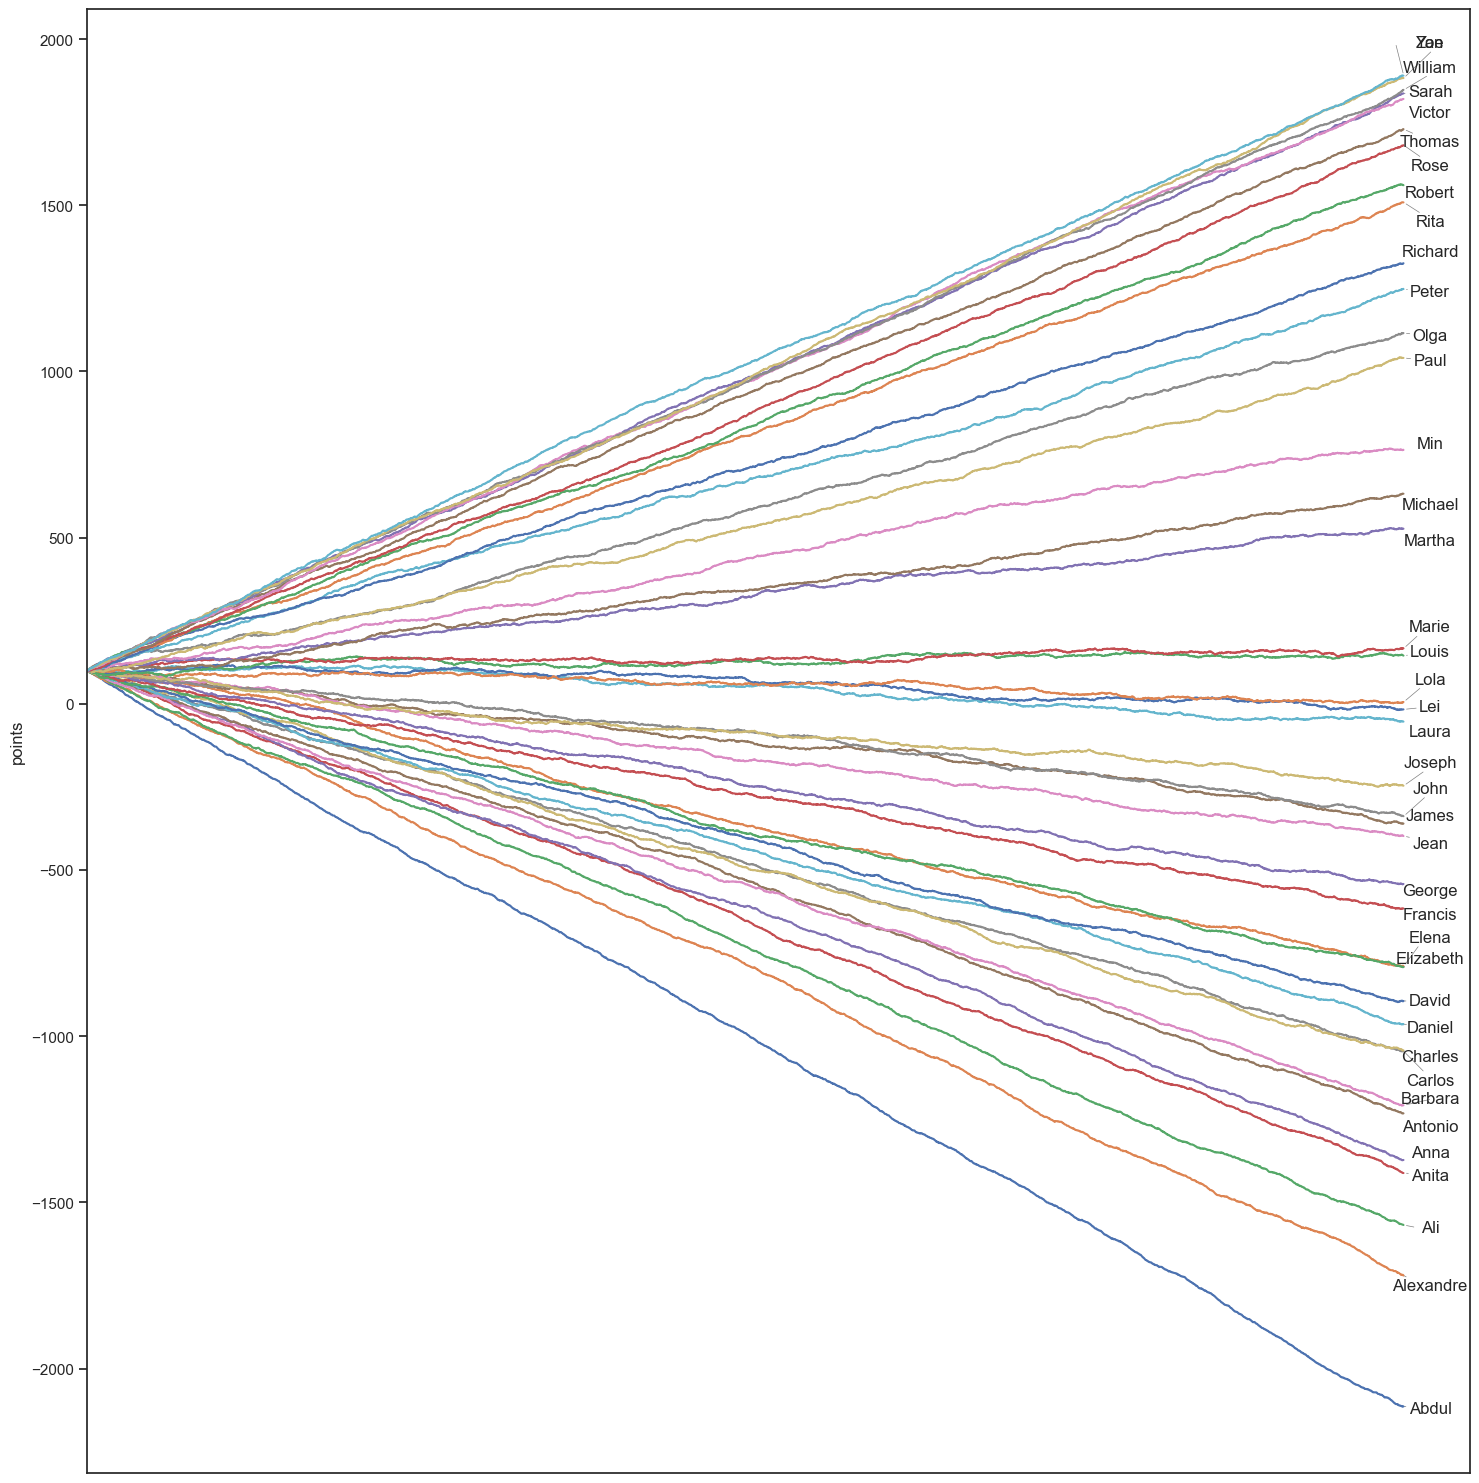

In [73]:
plt.figure(figsize=(15, 15))

sns.set_theme(style='ticks')
sns.despine()
x_label = len(df_score_02.columns)

texts=[]

for player in df_score_02.index:
    scores = df_score_02.loc[player]
    plt.plot(df_score_02.columns, scores, label=player)

    
    text = plt.text(
        x=x_label,   
        y=scores.iloc[-1],             
        s=player,
        fontsize=12,
        va='center',
        ha='left'
    )

    texts.append(text)

adjust_text(texts, only_move={'points': 'y', 'texts': 'y'}, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

for t in texts:
    t.set_x(x_label+100)

plt.xlim(-1, x_label + 250)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.title('')
plt.xlabel('')
plt.ylabel('points')
plt.grid(False)
plt.legend().remove()
plt.tight_layout()

plt.show()